In [1]:
import pandas as pd

In [3]:
data_1 = pd.read_csv("./datas/IID_1.csv")
data_2 = pd.read_csv("./datas/IID_2.csv")
data_all = pd.read_csv("./datas/IID.csv")

In [6]:
columns = data_all.drop(columns="Fraud").columns

<Axes: >

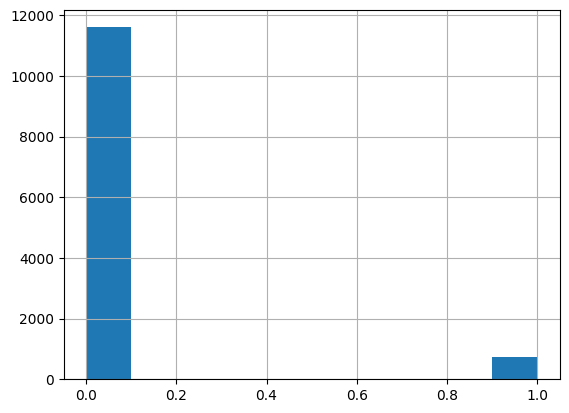

In [10]:
data_all.Fraud.hist()

In [1]:
import numpy as np

def generate_synthetic_data(num_clients=4, num_features=60, num_classes=10, num_samples_per_client=100, alpha=1.0, beta=1.0):
    """
    Generate synthetic data for distributed clients with heterogeneity.

    Args:
        num_clients (int): Number of clients (devices).
        num_features (int): Number of features (dimensions of x).
        num_classes (int): Number of output classes.
        num_samples_per_client (int): Number of samples per client.
        alpha (float): Controls heterogeneity in local models.
        beta (float): Controls heterogeneity in local data.

    Returns:
        dict: A dictionary containing data for each client. Keys are client IDs, and values are tuples (X, y).
    """
    # Initialize global model parameters
    W_global = np.random.randn(num_classes, num_features)
    b_global = np.random.randn(num_classes)

    # Covariance matrix for input data (diagonal)
    Sigma = np.diag([j**-1.2 for j in range(1, num_features + 1)])

    # Storage for client data
    client_data = {}

    for k in range(num_clients):
        # Generate local model parameters for client k
        W_k = W_global + np.random.randn(num_classes, num_features)
        u_k = np.random.normal(0, alpha, size=num_classes)
        b_k = u_k + np.random.normal(0, 1, size=num_classes)

        
        B_k = np.random.normal(0, beta, size=num_features)
        v_k = B_k + np.random.normal(0, 1, size=num_features)

        # Generate input data X and labels y for client k
        X_k = np.random.multivariate_normal(mean=v_k, cov=Sigma, size=num_samples_per_client)
        logits = X_k @ W_k.T + b_k  # Linear transformation for classification
        y_k = np.argmax(logits, axis=1)  # Assign labels using argmax

        # Store data for client k
        client_data[k] = (X_k, y_k)

    return client_data

# Example usage:
num_clients = 4
num_samples_per_client = 100
alpha = 0.5
beta = 0.5

client_data = generate_synthetic_data(num_clients=num_clients, num_samples_per_client=num_samples_per_client, alpha=alpha, beta=beta)

# Print a summary of the generated data
for client_id, (X, y) in client_data.items():
    print(f"Client {client_id}: X shape = {X.shape}, y shape = {y.shape}, unique labels = {np.unique(y)}")


Client 0: X shape = (100, 60), y shape = (100,), unique labels = [2 7]
Client 1: X shape = (100, 60), y shape = (100,), unique labels = [0 1 5 6 8 9]
Client 2: X shape = (100, 60), y shape = (100,), unique labels = [5 9]
Client 3: X shape = (100, 60), y shape = (100,), unique labels = [1 7 9]
